In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
import seaborn as sns
from scipy import stats
import pymprog as pm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
import csv
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
tickers = ['AAPL','MSFT','AMZN', 'TSLA','TGT']
multpl_stocks = web.get_data_yahoo(tickers,start = "2010-01-01", end = "2018-12-31")

In [3]:
multpl_stocks

Attributes  Adj Close                                                \
Symbols          AAPL       MSFT         AMZN       TSLA        TGT   
Date                                                                  
2010-01-04   6.583586  24.049969   133.899994        NaN  35.781143   
2010-01-05   6.594968  24.057743   134.690002        NaN  35.913811   
2010-01-06   6.490066  23.910097   132.250000        NaN  36.599209   
2010-01-07   6.478067  23.661432   130.000000        NaN  37.048771   
2010-01-08   6.521136  23.824627   133.520004        NaN  36.901375   
...               ...        ...          ...        ...        ...   
2018-12-24  35.800995  91.575211  1343.959961  59.077999  58.260010   
2018-12-26  38.322155  97.830696  1470.900024  65.218002  61.629726   
2018-12-27  38.073456  98.433876  1461.640015  63.226002  61.251095   
2018-12-28  38.092960  97.665306  1478.020020  66.774002  61.487740   
2018-12-31  38.461140  98.813278  1501.969971  66.559998  62.557343   

Attributes      Close                                                 ...  \
Symbols          AAPL        MSFT         AMZN       TSLA        TGT  ...   
Date                                                                  ...   
2010-01-04   7.643214   30.950001   133.899994        NaN  48.549999  ...   
2010-01-05   7.656429   30.959999   134.690002        NaN  48.730000  ...   
2010-01-06   7.534643   30.770000   132.250000        NaN  49.660000  ...   
2010-01-07   7.520714   30.450001   130.000000        NaN  50.270000  ...   
2010-01-08   7.570714   30.660000   133.520004        NaN  50.070000  ...   
...               ...         ...          ...        ...        ...  ...   
2018-12-24  36.707500   94.129997  1343.959961  59.077999  61.549999  ...   
2018-12-26  39.292500  100.559998  1470.900024  65.218002  65.110001  ...   
2018-12-27  39.037498  101.180000  1461.640015  63.226002  64.709999  ...   
2018-12-28  39.057499  100.389999  1478.020020  66.774002  64.959999  ...   
2018-12-31  39.435001  101.570000  1501.969971  66.559998  66.089996  ...   

Attributes       Open                                                 \
Symbols          AAPL        MSFT         AMZN       TSLA        TGT   
Date                                                                   
2010-01-04   7.622500   30.620001   136.250000        NaN  48.470001   
2010-01-05   7.664286   30.850000   133.429993        NaN  48.509998   
2010-01-06   7.656429   30.879999   134.600006        NaN  48.590000   
2010-01-07   7.562500   30.629999   132.009995        NaN  50.200001   
2010-01-08   7.510714   30.280001   130.559998        NaN  50.049999   
...               ...         ...          ...        ...        ...   
2018-12-24  37.037498   97.680000  1346.000000  62.700001  60.709999   
2018-12-26  37.075001   95.139999  1368.890015  60.000000  62.400002   
2018-12-27  38.959999   99.300003  1454.199951  63.967999  64.370003   
2018-12-28  39.375000  102.089996  1473.349976  64.620003  65.180000   
2018-12-31  39.632500  101.290001  1510.800049  67.557999  65.330002   

Attributes       Volume                                                  
Symbols            AAPL        MSFT        AMZN        TSLA         TGT  
Date                                                                     
2010-01-04  493729600.0  38409100.0   7599900.0         NaN   4589100.0  
2010-01-05  601904800.0  49749600.0   8851900.0         NaN   4760100.0  
2010-01-06  552160000.0  58182400.0   7178800.0         NaN   7217400.0  
2010-01-07  477131200.0  50559700.0  11030200.0         NaN  12531000.0  
2010-01-08  447610800.0  51197400.0   9830500.0         NaN   6512800.0  
...                 ...         ...         ...         ...         ...  
2018-12-24  148676800.0  43935200.0   7220000.0  27799500.0   3623400.0  
2018-12-26  234330000.0  51634800.0  10411800.0  40815500.0   6157300.0  
2018-12-27  212468400.0  49498500.0   9722000.0  42875500.0   5706000.0  
2018-12-28  169165600.0  3819

In [6]:
# DESCRIPTIVE ANALYSIS 

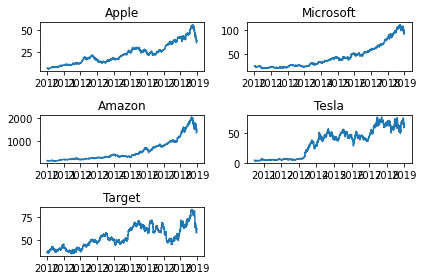

In [4]:
#chart the stock prices for each stocks
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(multpl_stocks['Adj Close']['AAPL'])
ax1.set_title("Apple")
ax2.plot(multpl_stocks['Adj Close']['MSFT'])
ax2.set_title("Microsoft")
ax3.plot(multpl_stocks['Adj Close']['AMZN'])
ax3.set_title("Amazon")
ax4.plot(multpl_stocks['Adj Close']['TSLA'])
ax4.set_title("Tesla")
ax5.plot(multpl_stocks['Adj Close']['TGT'])
ax5.set_title("Target")
plt.tight_layout()
plt.savefig('multpl_plot.png')
plt.show()


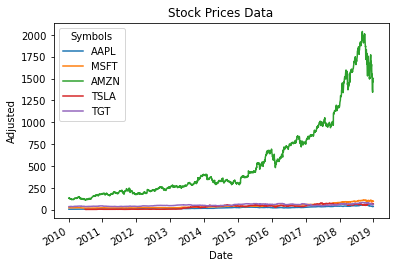

In [5]:
#plotting price trend for all stocks
multpl_stocks['Adj Close'].plot()
plt.xlabel ('Date')
plt.ylabel ('Adjusted')
plt.title ('Stock Prices Data')
plt.savefig('StockPricesData.jpg')
plt.show()


<Figure size 432x288 with 0 Axes>

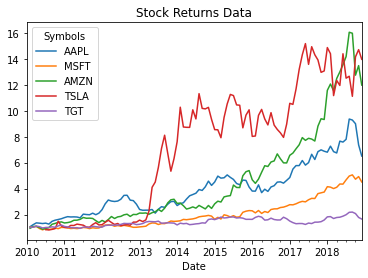

In [6]:
#Calculating amd plotting the returns for the stocks
multpl_stock_daily_returns = multpl_stocks['Adj Close'].pct_change()
multpl_stock_monthly_returns = multpl_stocks['Adj Close'].resample('M').ffill().pct_change()
fig = plt.figure()
(multpl_stock_monthly_returns + 1).cumprod().plot()
plt.title ('Stock Returns Data')
plt.savefig('StockReturns.jpg')
plt.show()

In [7]:
apple = web.get_data_yahoo("AAPL", start = "2010-01-01", end = "2018-12-31")
apple_daily_returns = apple['Adj Close'].pct_change()
apple_monthly_returns = apple['Adj Close'].resample('M').ffill().pct_change()
print(apple_daily_returns.head())

microsoft = web.get_data_yahoo("MSFT", start = "2010-01-01", end = "2018-12-31")
microsoft_daily_returns = microsoft['Adj Close'].pct_change()
apple_monthly_returns = microsoft['Adj Close'].resample('M').ffill().pct_change()
print(microsoft_daily_returns.head())

amazon = web.get_data_yahoo("AMZN", start = "2010-01-01", end = "2018-12-31")
amazon_daily_returns = amazon['Adj Close'].pct_change()
apple_monthly_returns = amazon['Adj Close'].resample('M').ffill().pct_change()
print(amazon_daily_returns.head())

tesla = web.get_data_yahoo("TSLA", start = "2010-01-01", end = "2018-12-31")
tesla_daily_returns = tesla['Adj Close'].pct_change()
tesla_monthly_returns = tesla['Adj Close'].resample('M').ffill().pct_change()
print(tesla_daily_returns.head())

target = web.get_data_yahoo("TGT", start = "2010-01-01", end = "2018-12-31")
target_daily_returns = target['Adj Close'].pct_change()
apple_monthly_returns = target['Adj Close'].resample('M').ffill().pct_change()
print(target_daily_returns.head())

Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
Name: Adj Close, dtype: float64
Date
2010-01-04         NaN
2010-01-05    0.000323
2010-01-06   -0.006137
2010-01-07   -0.010400
2010-01-08    0.006897
Name: Adj Close, dtype: float64
Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Adj Close, dtype: float64
Date
2010-06-29         NaN
2010-06-30   -0.002512
2010-07-01   -0.078472
2010-07-02   -0.125683
2010-07-06   -0.160938
Name: Adj Close, dtype: float64
Date
2010-01-04         NaN
2010-01-05    0.003708
2010-01-06    0.019085
2010-01-07    0.012283
2010-01-08   -0.003978
Name: Adj Close, dtype: float64


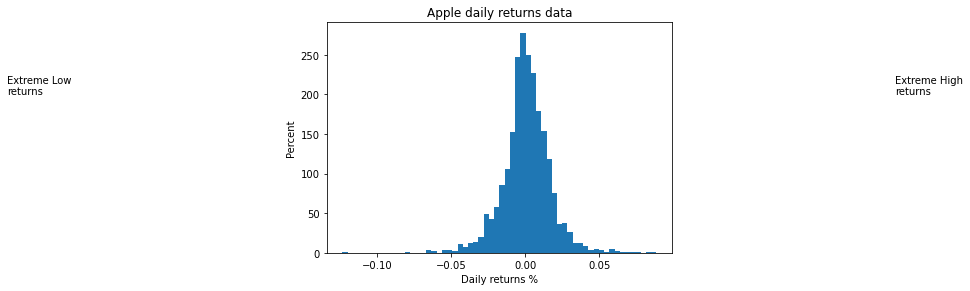

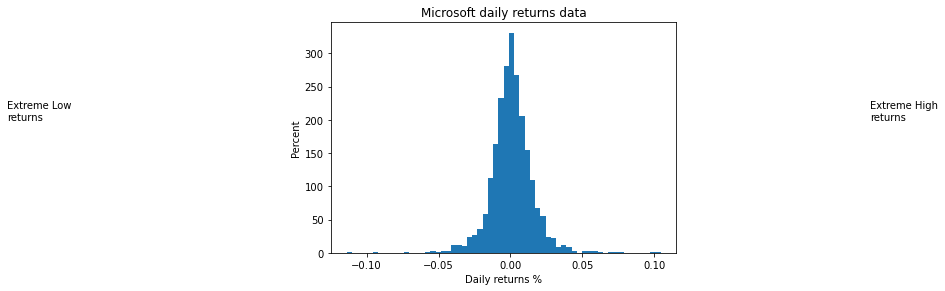

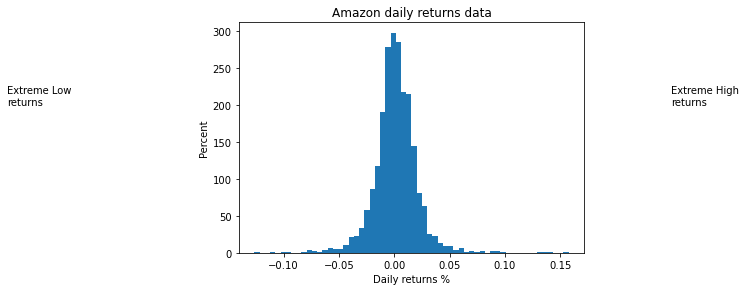

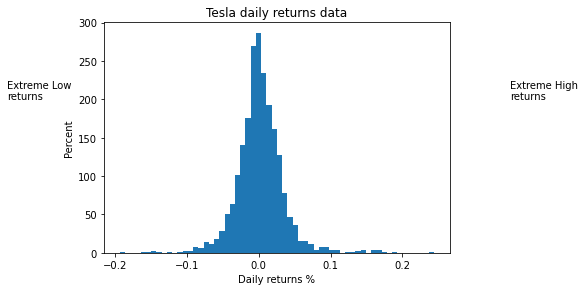

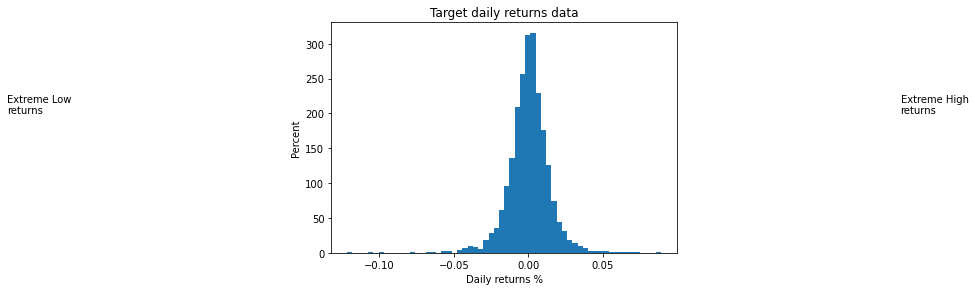

In [8]:
# Histogram to show distribution of the returns of each stock around their mean
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
apple_daily_returns .plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Apple daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
microsoft_daily_returns .plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Microsoft daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
amazon_daily_returns .plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Amazon daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
tesla_daily_returns .plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Tesla daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.35,200,"Extreme High\nreturns")
plt.show()

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
target_daily_returns .plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Target daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

In [9]:
#Calculating the Mean
print(multpl_stock_monthly_returns.mean())

Symbols
AAPL    0.020382
MSFT    0.016073
AMZN    0.026802
TSLA    0.037100
TGT     0.006573
dtype: float64


In [10]:
# Calculating the standard deviation
print(multpl_stock_monthly_returns.std())

Symbols
AAPL    0.074483
MSFT    0.062240
AMZN    0.083118
TSLA    0.159780
TGT     0.061483
dtype: float64


In [11]:
#Calculating the correlation
print(multpl_stock_monthly_returns.corr())

Symbols      AAPL      MSFT      AMZN      TSLA       TGT
Symbols                                                  
AAPL     1.000000  0.385830  0.335089  0.056165  0.284503
MSFT     0.385830  1.000000  0.411640  0.041216  0.181549
AMZN     0.335089  0.411640  1.000000  0.053451  0.179163
TSLA     0.056165  0.041216  0.053451  1.000000  0.067410
TGT      0.284503  0.181549  0.179163  0.067410  1.000000


In [13]:
#Calculating the covariance
print(multpl_stock_monthly_returns.cov())

Symbols      AAPL      MSFT      AMZN      TSLA       TGT
Symbols                                                  
AAPL     0.005548  0.001789  0.002075  0.000667  0.001303
MSFT     0.001789  0.003874  0.002130  0.000396  0.000695
AMZN     0.002075  0.002130  0.006909  0.000697  0.000916
TSLA     0.000667  0.000396  0.000697  0.025530  0.000662
TGT      0.001303  0.000695  0.000916  0.000662  0.003780


Symbols      AAPL      MSFT      AMZN      TSLA       TGT
Symbols                                                  
AAPL     1.000000  0.385830  0.335089  0.056165  0.284503
MSFT     0.385830  1.000000  0.411640  0.041216  0.181549
AMZN     0.335089  0.411640  1.000000  0.053451  0.179163
TSLA     0.056165  0.041216  0.053451  1.000000  0.067410
TGT      0.284503  0.181549  0.179163  0.067410  1.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

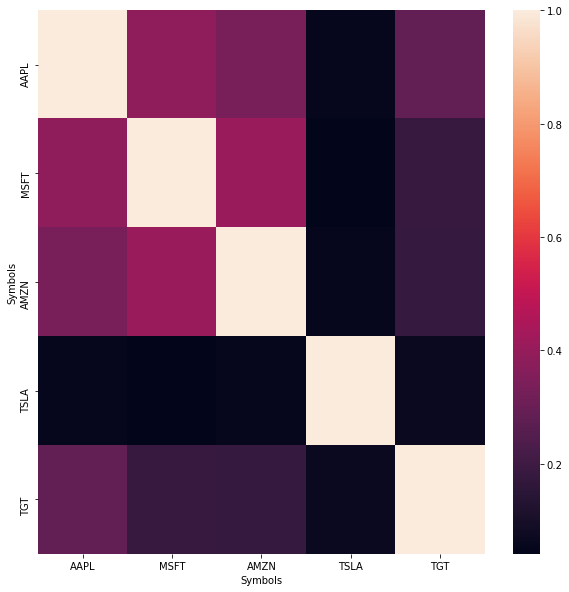

In [14]:
# Heatmap to show correclation of the returns of each stock to the other
plt.subplots(figsize=(10,10))
corr=multpl_stock_monthly_returns.corr()
print(corr)
sns.heatmap(corr)

In [15]:
tick = ['AAPL','MSFT','AMZN', 'TSLA','TGT']
price_data = web.get_data_yahoo(tick,start = "2010-01-01", end = "2018-12-31")['Adj Close']

In [16]:
log_ret = np.log(price_data/price_data.shift(1))

In [17]:
cov_mat = log_ret.cov() * 252
print(cov_mat)

Symbols      AAPL      MSFT      AMZN      TSLA       TGT
Symbols                                                  
AAPL     0.066120  0.026169  0.031289  0.030875  0.013824
MSFT     0.026169  0.052921  0.034347  0.029941  0.014524
AMZN     0.031289  0.034347  0.100097  0.046795  0.016146
TSLA     0.030875  0.029941  0.046795  0.264237  0.012976
TGT      0.013824  0.014524  0.016146  0.012976  0.051082


In [18]:
#Prescriptive
pm.begin('Client Recommendation')
a, b, c, d, e = pm.var('x1, x2, x3, x4, x5') #AAPL, MSFT, AMZN, TSLA, TGT
pm.maximize(.02*a + .016*b + .027*c + .037*d + .007*e, 'profit') #using average means of returns
a + b +c + d + e <= 100000 #investor's limit of $100k
5.55*a + 3.87*b + 6.90*c + 25.53*d + 3.78*e <= 250
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 1.0335917312661498

PyMathProg 1.0 Sensitivity Report Created: 2021/02/21 Sun 13:41PM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
 x1                        0  -0.00294574         0.02         -inf    0.0229457
*x2                  64.5995            0        0.016    0.0151435 1.79769e+308
 x3                        0  -0.00152713        0.027         -inf    0.0285271
 x4                        0   -0.0685504        0.037         -inf      0.10555
 x5                        0  -0.00862791        0.007         -inf    0.0156279
Constraint       Activity Dual.Value  Lower.Bnd  Upper.Bnd RangeLower RangeUpper
--------------------------------------------------------------------------------
*R1               64.5995          0       -inf     100000    64.5995    64.5995
 R2                   250 0.00413437       -inf        250          0     387000


model('Client Recommendation') is not the default model.

In [20]:
#LOW RISK CLIENT
pm.begin('Client Recommendation')
a, b, c, d, e = pm.var('x1, x2, x3, x4, x5') #AAPL, MSFT, AMZN, TSLA, TGT
pm.maximize(.02*a + .016*b + .027*c + .037*d + .007*e, 'profit') #using average means of returns
a + b +c + d + e <= 100 #investor's limit of $100k
5.55*a + 3.87*b + 6.90*c + 25.53*d + 3.78*e <= 500
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 2.0102310231023104

PyMathProg 1.0 Sensitivity Report Created: 2021/02/21 Sun 13:42PM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
 x1                        0  -0.00209901         0.02         -inf     0.022099
*x2                  62.7063            0        0.016    0.0151435    0.0253736
*x3                  37.2937            0        0.027    0.0232143    0.0285271
 x4                        0   -0.0576337        0.037         -inf    0.0946337
 x5                        0  -0.00867327        0.007         -inf    0.0156733
Constraint       Activity Dual.Value  Lower.Bnd  Upper.Bnd RangeLower RangeUpper
--------------------------------------------------------------------------------
 R1                   100  0.0019505       -inf        100    72.4638    129.199
 R2                   500 0.00363036       -inf        500        387        690


model('Client Recommendation') is not the default model.

In [21]:
#LOW-MEDIUM RISK CLIENT
pm.begin('Client Recommendation')
a, b, c, d, e = pm.var('x1, x2, x3, x4, x5') #AAPL, MSFT, AMZN, TSLA, TGT
pm.maximize(.02*a + .016*b + .027*c + .037*d + .007*e, 'profit') #using average means of returns
a + b +c + d + e <= 100 #investor's limit of $100k
5.55*a + 3.87*b + 6.90*c + 25.53*d + 3.78*e <= 1000
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 2.8663982823403114

PyMathProg 1.0 Sensitivity Report Created: 2021/02/21 Sun 13:42PM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
 x1                        0  -0.00627536         0.02         -inf    0.0262754
 x2                        0  -0.00937359        0.016         -inf    0.0253736
*x3                  83.3602            0        0.027    0.0211486        0.037
*x4                  16.6398            0        0.037        0.027    0.0946337
 x5                        0   -0.0183253        0.007         -inf    0.0253253
Constraint       Activity Dual.Value  Lower.Bnd  Upper.Bnd RangeLower RangeUpper
--------------------------------------------------------------------------------
 R1                   100  0.0232963       -inf        100    39.1696    144.928
 R2                  1000 0.000536769       -inf       1000        690       2553


model('Client Recommendation') is not the default model.

In [22]:
#MEDIUM RISK
pm.begin('Client Recommendation')
a, b, c, d, e = pm.var('x1, x2, x3, x4, x5') #AAPL, MSFT, AMZN, TSLA, TGT
pm.maximize(.02*a + .016*b + .027*c + .037*d + .007*e, 'profit') #using average means of returns
a + b +c + d + e <= 100 #investor's limit of $100k
5.55*a + 3.87*b + 6.90*c + 25.53*d + 3.78*e <= 1500
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 3.134782608695652

PyMathProg 1.0 Sensitivity Report Created: 2021/02/21 Sun 13:42PM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
 x1                        0  -0.00627536         0.02         -inf    0.0262754
 x2                        0  -0.00937359        0.016         -inf    0.0253736
*x3                  56.5217            0        0.027    0.0211486        0.037
*x4                  43.4783            0        0.037        0.027    0.0946337
 x5                        0   -0.0183253        0.007         -inf    0.0253253
Constraint       Activity Dual.Value  Lower.Bnd  Upper.Bnd RangeLower RangeUpper
--------------------------------------------------------------------------------
 R1                   100  0.0232963       -inf        100    58.7544    217.391
 R2                  1500 0.000536769       -inf       1500        690       2553


model('Client Recommendation') is not the default model.

In [23]:
#MEDIUM-HIGH RISK
pm.begin('Client Recommendation')
a, b, c, d, e = pm.var('x1, x2, x3, x4, x5') #AAPL, MSFT, AMZN, TSLA, TGT
pm.maximize(.02*a + .016*b + .027*c + .037*d + .007*e, 'profit') #using average means of returns
a + b +c + d + e <= 100 #investor's limit of $100k
5.55*a + 3.87*b + 6.90*c + 25.53*d + 3.78*e <= 2000
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 3.4031669350509928

PyMathProg 1.0 Sensitivity Report Created: 2021/02/21 Sun 13:42PM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
 x1                        0  -0.00627536         0.02         -inf    0.0262754
 x2                        0  -0.00937359        0.016         -inf    0.0253736
*x3                  29.6833            0        0.027    0.0211486        0.037
*x4                  70.3167            0        0.037        0.027    0.0946337
 x5                        0   -0.0183253        0.007         -inf    0.0253253
Constraint       Activity Dual.Value  Lower.Bnd  Upper.Bnd RangeLower RangeUpper
--------------------------------------------------------------------------------
 R1                   100  0.0232963       -inf        100    78.3392    289.855
 R2                  2000 0.000536769       -inf       2000        690       2553


model('Client Recommendation') is not the default model.

In [24]:
#RISKy (DOES NOT CARE ABOUT RISK)
pm.begin('Client Recommendation')
a, b, c, d, e = pm.var('x1, x2, x3, x4, x5') #AAPL, MSFT, AMZN, TSLA, TGT
pm.maximize(.02*a + .016*b + .027*c + .037*d + .007*e, 'profit') #using average means of returns
a + b +c + d + e <= 100 #investor's limit of $100k
5.55*a + 3.87*b + 6.90*c + 25.53*d + 3.78*e <= 2560
pm.solve()
print('\nMax profit:',pm.vobj())
pm.sensitivity()
pm.end()


Max profit: 3.6999999999999997

PyMathProg 1.0 Sensitivity Report Created: 2021/02/21 Sun 13:42PM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
 x1                        0       -0.017         0.02         -inf        0.037
 x2                        0       -0.021        0.016         -inf        0.037
 x3                        0        -0.01        0.027         -inf        0.037
*x4                      100            0        0.037        0.027 1.79769e+308
 x5                        0        -0.03        0.007         -inf        0.037
Constraint       Activity Dual.Value  Lower.Bnd  Upper.Bnd RangeLower RangeUpper
--------------------------------------------------------------------------------
 R1                   100      0.037       -inf        100          0    100.274
*R2                  2553          0       -inf       2560       2553       2553


model('Client Recommendation') is not the default model.

In [23]:
#comparing our portfolio to a benchmark, like the S&P using Alpha and Beta
#Alpha and beta are standard technical risk calculations that investment managers use to calculate and compare an investment’s returns, along with standard deviation, R-squared, and the Sharpe ratio.
#Alpha is the excess return (also known as the active return), an investment or a portfolio of investments ushers in, above and beyond a market index or benchmark that represent the market’s broader movements
#Beta is a measurement of the volatility, or systematic risk of a security or portfolio, compared to the market as a whole

#scenario 1 - Low risk
tickers = ['AAPL','MSFT','AMZN', 'TSLA','TGT']
wts = [0.0,0.63,0.37,0.00,0.0]

In [24]:
price_data = web.get_data_yahoo(tickers,start = "2010-01-01", end = "2018-12-31")
price_data = price_data['Adj Close']

In [25]:
ret_data = price_data.pct_change()[1:]

In [26]:
port_ret = (ret_data * wts).sum(axis = 1)

In [27]:
benchmark_price = web.get_data_yahoo('SPY',start = "2010-01-01", end = "2018-12-31")                            
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

C:\Users\luisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


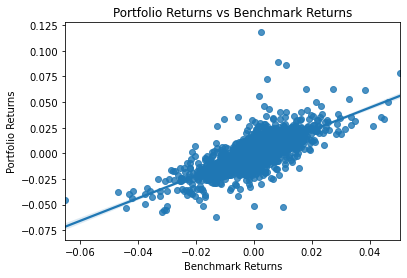

In [28]:
sns.regplot(benchmark_ret.values,
port_ret.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.savefig('Portfolio Returns vs Benchmark Returns Low Risk.jpg')
plt.show()

In [29]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
#our investment is 10.35% more volatile than benchmark

The portfolio beta is 1.1035


In [30]:
print("The portfolio alpha is", round(alpha,5))
#our investment portfolio outperformed the benchmark by 0.00041

The portfolio alpha is 0.00041


In [31]:
#scenario 2 - Medium risk

tickers = ['AAPL','MSFT','AMZN', 'TSLA','TGT']
#wts = [0.1,0.2,0.25,0.25,0.2]
wts = [0.0,0.57,0.43,0.00,0.0]

In [32]:
price_data = web.get_data_yahoo(tickers,start = "2010-01-01", end = "2018-12-31")
price_data = price_data['Adj Close']

In [33]:
ret_data = price_data.pct_change()[1:]

In [34]:
port_ret = (ret_data * wts).sum(axis = 1)

In [35]:
benchmark_price = web.get_data_yahoo('SPY',start = "2010-01-01", end = "2018-12-31")                            
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

C:\Users\luisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


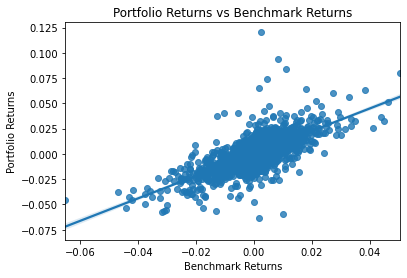

In [36]:
sns.regplot(benchmark_ret.values,
port_ret.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.savefig('Portfolio Returns vs Benchmark Returns Medium Risk.jpeg')
plt.show()

In [37]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))

The portfolio beta is 1.1113


In [38]:
print("The portfolio alpha is", round(alpha,5))

The portfolio alpha is 0.00043


In [39]:
#scenario 3 - High risk

tickers = ['AAPL','MSFT','AMZN', 'TSLA','TGT']
#wts = [0.1,0.2,0.25,0.25,0.2]
wts = [0.0,0.0,0.0,1.00,0.0]

In [40]:
price_data = web.get_data_yahoo(tickers,start = "2010-01-01", end = "2018-12-31")
price_data = price_data['Adj Close']

In [41]:
ret_data = price_data.pct_change()[1:]

In [42]:
port_ret = (ret_data * wts).sum(axis = 1)

In [43]:
benchmark_price = web.get_data_yahoo('SPY',start = "2010-01-01", end = "2018-12-31")                            
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

C:\Users\luisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


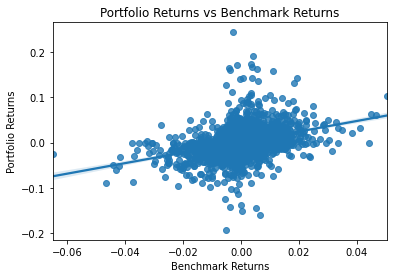

In [44]:
sns.regplot(benchmark_ret.values,
port_ret.values)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.savefig('Portfolio Returns vs Benchmark Returns High Risk.jpeg')
plt.show()

In [45]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))

The portfolio beta is 1.1646


In [46]:
print("The portfolio alpha is", round(alpha,5))

The portfolio alpha is 0.00111


In [47]:
tickers = ['AAPL','MSFT','AMZN', 'TSLA','TGT']
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2018, 12, 31)
df = pd.DataFrame([data.DataReader(ticker, 'yahoo', start, end)['Adj Close'] for ticker in tickers]).T
df.columns = tickers

In [48]:
#using monte carlo simulation method which finds the optimal portfolio by randomly choosing weights

def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
        
    return results_df

In [49]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0

results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov, rf)
results_frame

,ret,stdev,sharpe,AAPL,MSFT,AMZN,TSLA,TGT
0,0.274982,0.241135,1.140369,0.044700,0.025430,0.285242,0.316484,0.328144
1,0.230206,0.190358,1.209328,0.245829,0.176774,0.166070,0.146784,0.264543
2,0.282594,0.230451,1.226264,0.269962,0.128093,0.193926,0.279650,0.128369
3,0.224683,0.197043,1.140273,0.056492,0.188401,0.197388,0.183343,0.374376
4,0.272246,0.228785,1.189967,0.010356,0.268610,0.285449,0.256505,0.179079
...,...,...,...,...,...,...,...,...
99995,0.247508,0.215970,1.146029,0.046399,0.412209,0.409352,0.052663,0.079377
99996,0.189442,0.178233,1.062888,0.364490,0.192162,0.116866,0.012510,0.313971
99997,0.266249,0.221528,1.201873,0.355106,0.035873,0.139988,0.259772,0.209262
99998,0.247145,0.201413,1.227059,0.267272,0.132449,0.344247,0.081610,0.174422


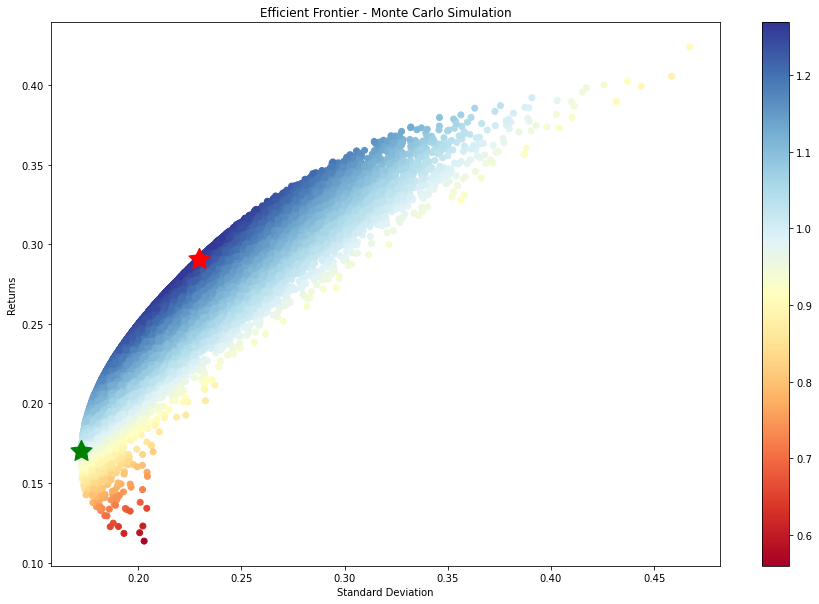

In [50]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.title('Efficient Frontier - Monte Carlo Simulation')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.savefig ('montecarlosimulation.jpeg')
plt.show()

In [51]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,AAPL,MSFT,AMZN,TSLA,TGT
12551,0.290937,0.229217,1.269267,0.331083,0.127266,0.335742,0.186359,0.01955


In [52]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AAPL,MSFT,AMZN,TSLA,TGT
59660,0.170235,0.17228,0.988125,0.200177,0.287711,0.070079,0.028781,0.413251


In [53]:
# using the scipy method
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

In [54]:
pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=tickers).T

,AAPL,MSFT,AMZN,TSLA,TGT
0,0.32,0.13,0.33,0.18,0.03


In [55]:
def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    return portfolio_std

def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

min_port_variance = min_variance(mean_returns, cov)

In [56]:
pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=tickers).T

,AAPL,MSFT,AMZN,TSLA,TGT
0,0.21,0.29,0.05,0.03,0.42


In [57]:
def calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var


def simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
            
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR'] + [ticker for ticker in tickers])
    return results_df

In [58]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0
days = 252
alpha = 0.05

results_frame = simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha, days)
results_frame

,ret,stdev,VaR,AAPL,MSFT,AMZN,TSLA,TGT
0,0.334556,0.283673,0.132044,0.197921,0.096124,0.276622,0.409445,0.019889
1,0.267107,0.215260,0.086965,0.327922,0.245093,0.154241,0.207081,0.065663
2,0.198345,0.177903,0.094279,0.270801,0.273731,0.149906,0.031376,0.274186
3,0.244449,0.204545,0.091998,0.213639,0.287998,0.093288,0.217139,0.187936
4,0.183089,0.174886,0.104574,0.277550,0.235950,0.126540,0.011206,0.348754
...,...,...,...,...,...,...,...,...
99995,0.224978,0.193576,0.093426,0.448371,0.059249,0.102881,0.124163,0.265335
99996,0.254890,0.213768,0.096727,0.055628,0.168931,0.281818,0.218906,0.274717
99997,0.258097,0.212181,0.090909,0.365726,0.065262,0.390852,0.060861,0.117299
99998,0.290178,0.230595,0.089118,0.437721,0.045426,0.289834,0.193720,0.033299


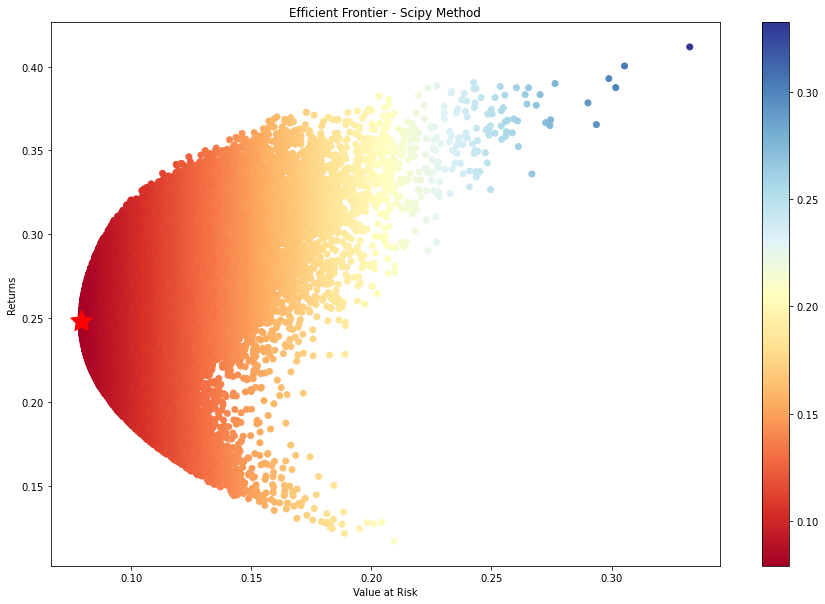

In [59]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.title ('Efficient Frontier - Scipy Method')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.savefig ('Efficient Frontier - Scipy Method')
plt.show()

In [60]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,AAPL,MSFT,AMZN,TSLA,TGT
98921,0.248189,0.19893,0.079022,0.276407,0.198551,0.235519,0.133964,0.155559


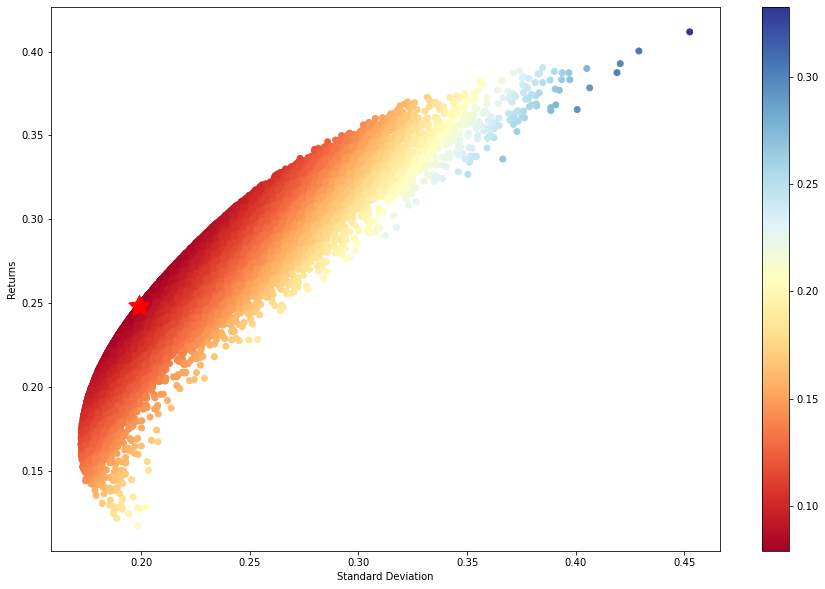

In [61]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()

#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[1],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [62]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def calc_portfolio_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_var

def min_VaR(mean_returns, cov, alpha, days):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha, days)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_VaR, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

min_port_VaR = min_VaR(mean_returns, cov, alpha, days)

In [63]:
pd.DataFrame([round(x,2) for x in min_port_VaR['x']],index=tickers).T

,AAPL,MSFT,AMZN,TSLA,TGT
0,0.28,0.19,0.24,0.13,0.16
